Homework 3 Report
==================================================
Note that the professor verbally mentioned that it was recommended to include both the explanations of the answers to the homework as well as the source code and plots needed for the homework in one single report. Therefore, the content in this report contains the answers and explanations for the homework as well as the underlying source code needed to provide these answers.


- The GitHub link to the Assignment Repository is :
- https://github.com/tmasse11/ECGR_5101

- The GitHub link to the Jupyter Notebook is : 
- https://github.com/tmasse11/ECGR_5101/blob/main/TerrillMassey_800670388_Homework3.ipynb


Author: Terrill Earl Massey
Student ID: 800670388

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 1 of the homework. 
===========================================================================================================================
The task is to use the a cancer patient dataset and build a logistic regression model to classiy the type of cancer (Malignant vs. benign).  This will be done for all 30 input features. Afterwards we shall determine if we can train a logistic regression over these number of features. 
 


The First step is to load the cancer dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
breast_cancer = load_breast_cancer()
input_data = breast_cancer.data
labels = np.reshape(breast_cancer.target, (569,1))

breast_data = np.concatenate([input_data, labels], axis=1)
breast_data_df = pd.DataFrame(breast_data)

features = breast_cancer.feature_names
features_labels = np.append(features, 'label')
breast_data_df.columns = features_labels
breast_data_df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


The next step is to create a custom series of functions that perform gradient descent on a logistic regression. This is necessary so that loss and classification accuracy history can be ploted over iterations. The subsequent code block(6) contains the functions necessary to perform the gradient descent for logistic regression. The reference found at the link https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html assisted in constructing the gradient desecent for logistic regression.

In [3]:
def sigmoid(input_data):
    """
    Sigmoid activation function. This function is the equivalent of  H(X) = 1 / (transpose(theta and X)

    Inputs:
        input_data : theta_weights transposed with input features.

    Outputs:
        sigmoid of input_data
    """
    return 1.0 / (1 + np.exp(-input_data))


def sigmoid_prediction(input_features, thetas):
    """
    This is the H_theta(X) function.
    Inputs:
    input_features : Multi-dimensional array of input features. Array shape: [Number of Features X Number of Observations]
    thetas: 1xN array of training theta weights. N should be equal to Number of features +  1.

    Outputs:
    predictions: 1D array of propbabilities of observation belonging to the class (Berign in this case).

    """
    predictions = np.dot(input_features, thetas)
    return sigmoid(predictions)


def cost_function(input_features, labels, theta_weights):
    """
    Computes the cost of all training samples for logistic regression.

    Inputs:
    input_features: Multi-dimensional array of input features. Array shape: [Number of features X Number of Observations]
    labels: 1 x N array of labels(or y values) corresponding to the input_features array.
    theta_weights: 1xN array of training theta weights. N should be equal to the number of features + 1.
    """
    M = len(labels)

    cost = -(1 / M) * np.sum(labels * np.log(sigmoid_prediction(input_features, theta_weights)) + (1 - labels) * np.log(
        1 - sigmoid_prediction(input_features, theta_weights)))
    return cost


def calc_accuracy(predicted_labels, actual_labels):
    """
    Function that calculates the accuracy of the model.
    Accuracy = correct predictions / total predictions
    """
    correct_predictions = 0
    for indx in range(0, len(actual_labels)):
        if predicted_labels[indx] == actual_labels[indx]:
            correct_predictions += 1

    accuracy = correct_predictions / len(actual_labels)

    return accuracy


def gradient_descent(training_data, training_labels, validation_data, validation_labels, theta_weights, alpha, epochs):
    """
    Computes the gradient descent of the cost function for theta values.

    """

    M = len(labels)
    training_loss_history = np.zeros(epochs)
    validation_loss_history = np.zeros(epochs)
    training_accuracy_history = np.zeros(epochs)
    validiation_accuracy_history = np.zeros(epochs)

    for i in range(0, epochs):
        # Perform gradient descent. Recall Gradient Descent for logistic regression is similar to the gradient descent for linear regression, except that h(x) is the sigmoid function.
        h_of_x = sigmoid_prediction(training_data, theta_weights)  # H(x) sigmoid function.
        theta_weights = theta_weights - (alpha / M) * training_data.transpose().dot(
            h_of_x - training_labels)  # Update of theta values.

        training_predictions = np.round(
            sigmoid_prediction(training_data, theta_weights), decimals=0)  # threshold for a positive classification is 0.50
        validation_predictions = np.round(
            sigmoid_prediction(validation_data, theta_weights), decimals=0)  # Threshold for a positive classification is 0.50

        training_loss_history[i] = cost_function(training_data, training_labels,
                                                 theta_weights)  # Compute cost on trianing data for current theta values.
        training_accuracy_history[i] = calc_accuracy(training_predictions, training_labels)
        validiation_accuracy_history[i] = calc_accuracy(validation_predictions, validation_labels)
        validation_loss_history[i] = cost_function(validation_data, validation_labels,
                                                   theta_weights)  # Compute cost on validation data for current theta values.

    return theta_weights, training_loss_history, validation_loss_history, training_accuracy_history, validiation_accuracy_history


The next step is to perform gradient descent on all 30 input features. Input normalization was performed on the input data. Also an 80%, 20% split was used for training and validation data respectively.  

In [4]:
input_data = breast_data_df.values[:, :-1]
labels = breast_data_df.values[:, -1]

print("Input Data Shape: ", input_data.shape)
print("Data Label Shape: ", labels.shape)

# Perform min max scaler on input data.
scaler = MinMaxScaler()
input_data = scaler.fit_transform(input_data)

# split training and validation data based on a 80%, 20% split.
np.random.seed(0)
training_data, validation_data, training_labels, validation_labels = train_test_split(input_data, labels, train_size=0.8, test_size=0.2, random_state=np.random)

M_training = len(training_labels)
M_validation = len(validation_labels)

#Perform gradient descent on training data.
theta = np.zeros(31) # Initialize Theta.
x0 = np.zeros((M_training, 1))
training_data = np.hstack((x0, training_data))
x0_val = np.zeros((M_validation, 1))
validation_data = np.hstack((x0_val, validation_data))
alpha = 0.10
epochs = 60000


theta, training_loss_history, validation_loss_history, training_accuracy_history, validation_accuracy_history = gradient_descent(training_data,
                                                                                                                                training_labels,
                                                                                                                                validation_data,
                                                                                                                                validation_labels,
                                                                                                                                theta,
                                                                                                                                alpha,
                                                                                                                                epochs)




Input Data Shape:  (569, 30)
Data Label Shape:  (569,)


<b>Answer to Question 1. </b> The following sections are considered the answer to question 1.

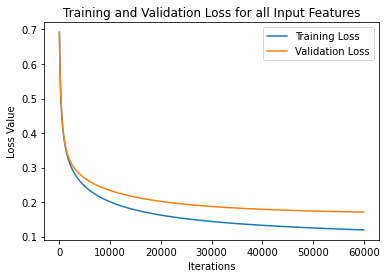

In [5]:
plt.plot(range(1, len(training_loss_history)+ 1), training_loss_history, label="Training Loss")
plt.plot(range(1, len(validation_loss_history) + 1), validation_loss_history, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss Value")
plt.title("Training and Validation Loss for all Input Features")
plt.legend()
plt.show()

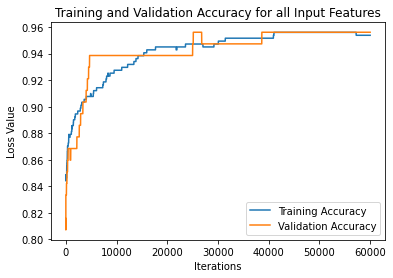

Final Valdiation Accuracy:  0.956140350877193


In [6]:
plt.plot(range(1, len(training_accuracy_history)+ 1), training_accuracy_history, label="Training Accuracy")
plt.plot(range(1, len(validation_accuracy_history) + 1), validation_accuracy_history, label="Validation Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Loss Value")
plt.title("Training and Validation Accuracy for all Input Features")
plt.legend()
plt.show()
print("Final Valdiation Accuracy: ", validation_accuracy_history[-1])

As illustrated by the Training and Validation Loss for All Inputs graph and Training and Validation Accuraacy for all Input Features graph in section 5 and 6 above, the logistic rgression model can be trained for all 30 input features. However it was quickly noticed that a very large amount of epochs were needed to allow the model to reach convergence in gradient descent. It is speculated that the high dimensionality of the dataset coupled with the relatively low amount of samples within the dataset was the main reason for this observation. With high dimensionality and low obersvations within the input dataset, the logistic regression model struggled to train/reach convergence. The model was only able to approach convergence with a large amount of epochs. Also, as indicated by the Training and Validation Loss figure, it appears that there is slight overfitting of the model during the end of the iterations. This is anticipated because logistic regression models typically overfit on datasets with high dimensionality and relatively low observation count. 

As illustrated in the Training and Validation accuracy graph in section 6, the training and validation accuracy generally increased as the amount of iterations increased. The training and validation accuracy only stablized/flat-lined once training convergence was met. This trend provides additional support to the fact that the logistic regression model could be trainable for all 30 input features. However, a large amount of iterations were needed in order to make the model approach convergence during gradient descent.

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 2 of the homework. 
===========================================================================================================================
The task is to use the a cancer patient dataset and use PCA feature extraction during the training of a logistic regression model. The optimum number of 
K principle components that achieve the highest clasfication accuracy will be selected. Since it is not required to plot loss and classification accuracy over iterations in this problem, the built in logistic regression API will be used. 
 


The first step is to perform normalization on the input data and then PCA on the input data.

In [7]:
input_data = breast_data_df.values[:, :-1]
labels = breast_data_df.values[:, -1]

print("Input Data Shape: ", input_data.shape)
print("Data Label Shape: ", labels.shape)

# Perform min max scaler on input data.
scaler = MinMaxScaler()
input_data = scaler.fit_transform(input_data)


# Perform Principal Component Analysis on Input Data.
pca = PCA()
principal_components = pca.fit_transform(input_data)

training_data_pcs, validation_data_pcs, training_labels_pcs, validation_labels_pcs = train_test_split(principal_components, labels, train_size=0.8, test_size=0.2, random_state=np.random)

Input Data Shape:  (569, 30)
Data Label Shape:  (569,)


The next step is to perform logistic regression  on N number of independent training (N=1, ...., K). Where K is the maximum possible amount of principal components that can be used.

In [8]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

max_possible_k_components = principal_components.shape[1]

accuracy_history = np.zeros(max_possible_k_components)
precision_history = np.zeros(max_possible_k_components)
recall_history = np.zeros(max_possible_k_components)
best_k_value = 0
best_accuracy = 0

for num_principal_components in range(1, max_possible_k_components+1):
    # Perform logistic regresion. 
    model = LogisticRegression()
    model.fit(training_data_pcs[:, :num_principal_components], training_labels_pcs) # Fit the model only for the amount of principal components for the current iteration.
    predictions = model.predict(validation_data_pcs[:, :num_principal_components])
    
    # Perform metrics for the current logistic regression model.
    precision_history[num_principal_components-1] = metrics.precision_score(validation_labels_pcs, predictions)
    recall_history[num_principal_components-1] = metrics.recall_score(validation_labels_pcs, predictions)
    accuracy_history[num_principal_components-1] = metrics.accuracy_score(validation_labels_pcs, predictions)
    
    # Determine if the current logistic regression model produces the best classification accuracy. 
    if metrics.accuracy_score(validation_labels_pcs, predictions) > best_accuracy:
        best_accuracy = metrics.accuracy_score(validation_labels_pcs, predictions)
        best_k_value = num_principal_components
        


        
    
    
    




<b>Answer to Question 2. </b> The following sections are considered the answer to question 2.

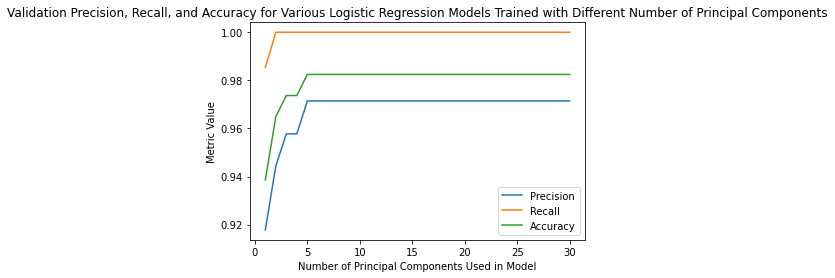

Best K Value :  5
Model Accuracy Score at Best K Value: 0.9825
Model Recall Score at Best K Value: 1.0000
Model Precision Score at Best K Value: 0.9714


In [9]:
plt.plot(range(1, max_possible_k_components+1), precision_history, label="Precision")
plt.plot(range(1, max_possible_k_components+1), recall_history, label="Recall")
plt.plot(range(1, max_possible_k_components+1), accuracy_history, label="Accuracy")
plt.xlabel("Number of Principal Components Used in Model")
plt.ylabel("Metric Value")
plt.legend()
plt.title("Validation Precision, Recall, and Accuracy for Various Logistic Regression Models Trained with Different Number of Principal Components")
plt.show()
print("Best K Value : ", best_k_value)
print("Model Accuracy Score at Best K Value: {:.4f}".format(accuracy_history[best_k_value-1]))
print("Model Recall Score at Best K Value: {:.4f}".format(recall_history[best_k_value - 1]))
print("Model Precision Score at Best K Value: {:.4f}".format(precision_history[best_k_value - 1]))

The figure produced in section 9 illustrates the Precision, Recall, and Accuracy of logistic regresion models that were trained on various numbers of principal components. As illustrated in this figure, the best/optimum number of principal components is 4. With this optimum K value of 4, the accuracy of this logistic regression model was shown to be better than the accuracy of the logistic regression model trained to all 30 input features of the cancer dataset. This observation was expected because the logistic regression model performs worse with datasets that have high dimensionality and relatively low amount of observations. Because PCA has considerably reduced the number of features within the dataset, the model performance had increased. 

It was also observed that the accuracy and precision increased until the best K value was reached. As the K value was increased further, the precision and accuracy remained unchanged. It is specualted that this phenomenon has occured because almost all of the representation for the dataset has already been included in the first 4 principal components(determined to be the optimal K value), and that additional principal components added to the model adds insignificant amount of information to the model during training. 

It is also observed that the recall decreased as the optimal K value was reached. It is speculated that this is common since the recall typically decreases as the precision increases.

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 3 of the homework. 
===========================================================================================================================
The task is to use the a cancer patient dataset and use LDA feature extraction during the training of the built in naive bayes classifier model. 

The first step is to split the input data into training and test data.


In [10]:
input_data = breast_data_df.values[:, :-1]
labels = breast_data_df.values[:, -1]

print("Input Data Shape: ", input_data.shape)
print("Data Label Shape: ", labels.shape)

# Perform min max scaler on input data.
scaler = MinMaxScaler()
input_data = scaler.fit_transform(input_data)

# split training and validation data based on a 80%, 20% split.
np.random.seed(0)
training_data, validation_data, training_labels, validation_labels = train_test_split(input_data, labels, train_size=0.8, test_size=0.2, random_state=np.random)

Input Data Shape:  (569, 30)
Data Label Shape:  (569,)


The next step is to perform Linear Discriminant Analysis with Naive Bayes Classification.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Perform LDA with Naive Bayes Classification.
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(training_data, training_labels)
predictions = lda_model.predict(validation_data)

# Obtain Metrics for the  Naive Bayes Model with LDA feature extraction.
accuracy = metrics.accuracy_score(validation_labels, predictions)
recall = metrics.recall_score(validation_labels, predictions)
precision = metrics.precision_score(validation_labels, predictions)

print("Accuracy Score: {:.4f}".format(accuracy))
print("Recall Score: {:.4f}".format(recall))
print("Precision Score: {:.4f}".format(precision))


Accuracy Score: 0.9649
Recall Score: 1.0000
Precision Score: 0.9437


<b>Answer to Question 3. </b> The following sections are considered the answer to question 3.

The metrics printed in section 11 illustrate the accuracy, recall, and precision of LDA with the built in Naive Bayes classifier model. The accuracy of the LDA with Naive Bayes classifier lower than the accuracy of the logistic regression model with PCA of 4 principal components. However, the accuracy of LDA with built in Naive Bayes model is higher than the logistic regression model with no feature extraction. It is believed that the LDA with Naive bayes contains a lower accuracy than that of the logistic regression model with PCA because the Naive Bayes classifier is typically not as generalizable. This may have caused a lower accuracy when validating on the test dataset. The recall score of the LDA with Naive Bayes was shown to be 1.00. This further indicates that the Naive Bayes model is not really generalized. The precision of the LDA with Naive Bayes approach(0.9437) was shown to be lower than the precision of the of the logistic regression model(0.9714) with PCA(4 principal components).

The resulting sections will cover explanations, code, and plots pertaining to PROBLEM 4 of the homework. 
===========================================================================================================================
The task is to use the a cancer patient dataset and use LDA feature extraction with Logistic Regression classification. The accuracy, precision, and recall will be compared to the models used in problem 2 and 3.

The first step is to split the input data into training and test data and peform LDA on input data.


In [12]:
input_data = breast_data_df.values[:, :-1]
labels = breast_data_df.values[:, -1]

print("Input Data Shape: ", input_data.shape)
print("Data Label Shape: ", labels.shape)

# Perform min max scaler on input data.
scaler = MinMaxScaler()
input_data = scaler.fit_transform(input_data)

# Perform LDA on input data.
lda = LinearDiscriminantAnalysis()
input_data_lda = lda.fit_transform(input_data, labels)

# split training and validation data based on a 80%, 20% split.
np.random.seed(0)
training_data, validation_data, training_labels, validation_labels = train_test_split(input_data_lda, labels, train_size=0.8, test_size=0.2, random_state=np.random)

Input Data Shape:  (569, 30)
Data Label Shape:  (569,)


The next step is to perform logistic regression. note that the built in Logistic Regression API can be used.

In [13]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(training_data, training_labels)
predictions = logistic_regression_model.predict(validation_data)


print("Accuracy Score: {:.4f}".format(metrics.accuracy_score(validation_labels, predictions)))
print("Recall Score: {:.4f}".format(metrics.recall_score(validation_labels, predictions)))
print("Precision Score: {:.4f}".format(metrics.precision_score(validation_labels, predictions)))

Accuracy Score: 0.9737
Recall Score: 0.9851
Precision Score: 0.9706


<b>Answer to Question 4. </b> The following sections are considered the answer to question 4.

Yes, as indicated in section 13 above, a logistic model can be trained with LDA. 

As shown in section 13 above, the accuracy of the logistic regression model with LDA is higher than the accuracy of the Naive Bayes Model with LDA, however less than the accuracy of the logistic regression model with PCA. The speculated  that the logistic regression model with LDA has a higher accuracy than the Naive Bayes Model with LDA because of the non-generalized nature of the Naive Bayes model. Also, the naive bayes model having a higher recall than the logistic regression models also showcase the naive bayes model as not being very generalized. It is speculated that the logistic regression model with PDA has a lower accuracy than the logistic regression model with PCA because the logistic model with PCA contains more usable features(optimum of 4 principal components) than the logistic model with LDA(1 component). This shows that a  <u>slightly</u> higher number of features provided a better training environment for the logistic regression model.  

The Recall of the logistic regression model with LDA was found to be lower than the recall of the logistic model with PCA. This indicates that the logistic regression model with LDA was slightly more generalized. The precision of the logistic regression model with LDA was found to be lower than the logistic model with PCA, however lower than the naive bayes model with LDA. 